<a href="https://colab.research.google.com/github/shrutishibu/python-and-statistics-for-financial-analysis/blob/main/Python_and_Statistics_for_Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notes**


> Relative frequency = Frequency / Total number of tries

> Relative frequency becomes more stable with more number of tries.

> For discrete variables, mean and variance can be calculated for probability distribution.

> For continuous variables, are under the Probability Density function determines the probability.

> VaR: Measure of how much a set of invstment might lose


---



# **Useful Code snippets**

> sort_index() function : sorts dataframes, series

# Simple trading strategy using moving averages

In [ ]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
#displays plot within the notebook

In [ ]:
#read from csv files and store as dataframes
fb = pd.read_csv('/facebook.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [ ]:
#moving averages for simple trading strategy
fb['MA10'] = fb['Close'].rolling(window=10).mean() #fast signal
fb['MA50'] = fb['Close'].rolling(window=50).mean() #slow signal
fb = fb.dropna()
#generate trading signals: long (1) if MA10 > MA50, otherwise 0
fb.loc[:,'Shares'] = (fb['MA10'] > fb['MA50']).astype(int)
#add a column for the next day's closing prices
fb.loc[:,'Close1'] = fb['Close'].shift(-1)
#calculate profit: difference in closing prices if long, otherwise 0
fb.loc[:,'Profit'] = (fb['Close1'] - fb['Close']).where(fb['Shares'] == 1, 0)
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit
245,2015-12-21,32.490002,32.930000,32.200001,32.900002,32.460278,7105400,32.816,30.3558,1,32.930000,0.029998
246,2015-12-22,33.000000,33.259998,32.730000,32.930000,32.489876,3233800,32.753,30.4874,1,33.060001,0.130001
247,2015-12-23,32.980000,33.189999,32.919998,33.060001,32.618134,3063100,32.788,30.6206,1,33.169998,0.109997
248,2015-12-24,32.959999,33.250000,32.910000,33.169998,32.726662,1311200,32.807,30.7368,1,33.139999,-0.029999
249,2015-12-28,32.820000,33.139999,32.360001,33.139999,32.697067,3550600,32.872,30.8510,1,33.680000,0.540001


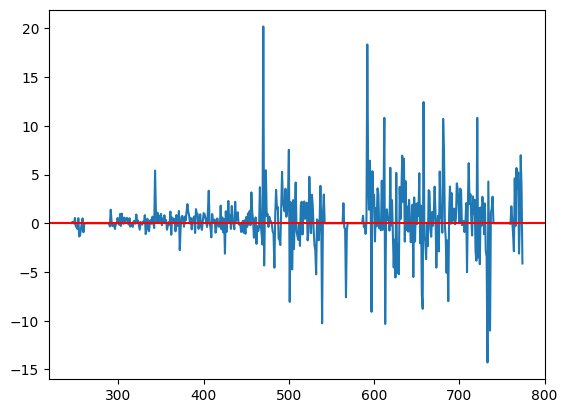

In [ ]:
#plotting profit
fb['Profit'].plot()
plt.axhline(y=0, color='red')

In [ ]:
#calculating accumalated wealth
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
771,2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300,227.852000,207.703600,1,236.350006,0.550003,164.640013
772,2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100,229.119002,208.107800,1,243.330002,6.979996,171.620009
773,2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900,231.044002,208.721800,1,246.850006,3.520004,175.140013
774,2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900,233.431003,209.375201,1,242.720001,-4.130005,171.010008
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 171.010008')

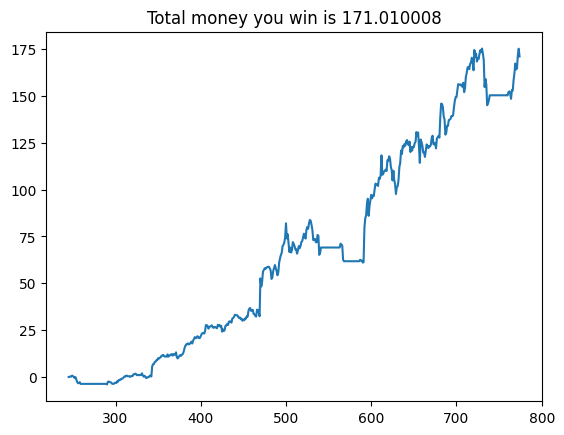

In [ ]:
#plotting wealth to show growth of profit
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

# Models of stock return

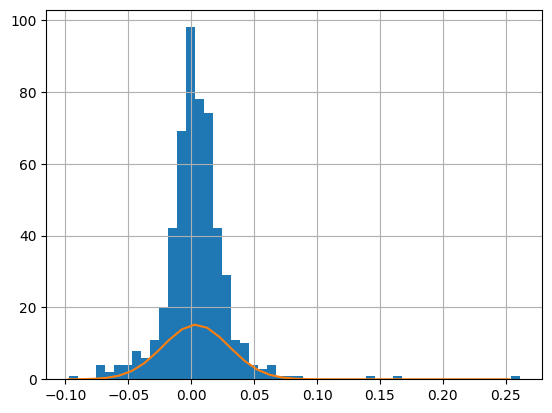

In [ ]:
#calculating log returns
fb['log_return'] = np.log(fb['Close1']) - np.log(fb['Close'])
#plotting histogram of log return
mu = fb['log_return'].mean()
sigma = fb['log_return'].std(ddof=1)
density = pd.DataFrame()
density['X'] = np.arange(fb['log_return'].min(), fb['log_return'].max(), 0.01)
density['pdf'] = norm.pdf(density['X'], mu, sigma)
fb['log_return'].hist(bins=50)
plt.plot(density['X'], density['pdf'])
plt.show()

In [ ]:
#probability whether stock price would fall in a certain day by 5%
prob_1 = norm.cdf(-0.05, mu, sigma)
print(prob_1)
#probability whether stock price would fall in a certain day by 10%
prob_2 = norm.cdf(-0.1, mu, sigma)
print(prob_2)

0.02020301144946517
3.819971078944733e-05


In [ ]:
#probability that stock price would fall in a year
#there are 220 estimated days in the market in a year
mu220 = 220*mu
sigma220 = (220**0.5)*sigma
prob_year = norm.cdf(-0.2, mu220, sigma220)
print(prob_year)

0.004075408806894025


In [ ]:
#calculating value at risk
#single day VaR
#also called 5% quantile (change percentage accordingly)
var = norm.ppf(0.05, mu, sigma)
print(var)

-0.03938214990006452
